## Contents of the Notebook

#### Part 1 : Exploratory Data Analysis:
1) Analasis of the features.
2) Finding any realations or trends considering multiple features.

#### Part 2 : Feature Engineering and Data Cleaning:

1. Adding any few features.
2. Removing redundant features.
3. Converting features into suitable form for modeling.

#### Part 3 : Predictive Modeling

1. Running Basic Algorithms.
2. Cross Validation.
3. Ensembling.
4. Important Features Extraction.

### Part 1 :Exploratory Data Analysis(EDA) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked 에 Null 값이 존재한다. 수정이 필요하다.


#### 생존자는 몇명인가?

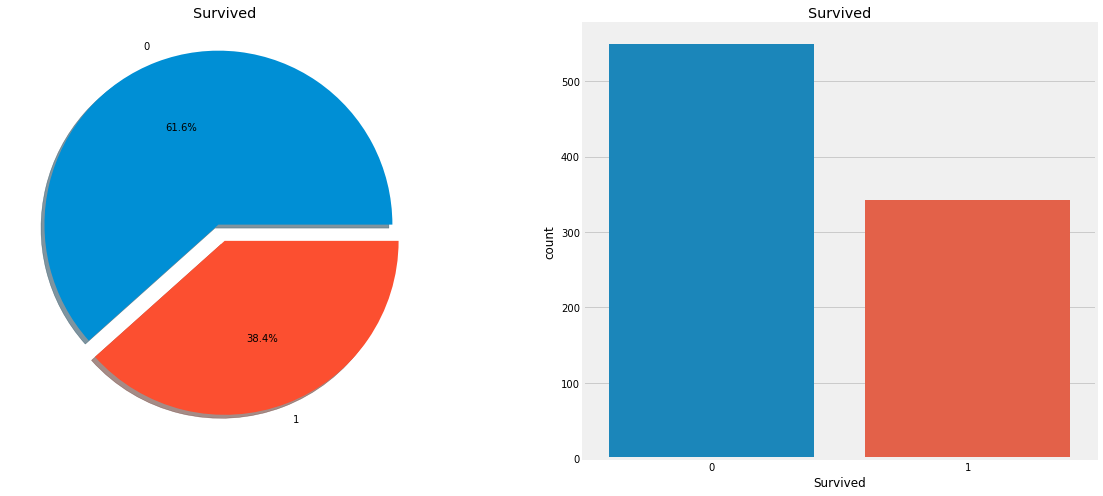

0    549
1    342
Name: Survived, dtype: int64


In [21]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
data['Survived'].value_counts().plot.pie(explode = [0.1,0], autopct = '%.1f%%' , ax = ax[0], shadow = True )

# explode 각 항목 파이 원점에서 튀어나온 정도
# autopct 각 항목의 퍼센트 표시
# ax 그래프 위치

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()
print(data['Survived'].value_counts())

타이타닉 사고에서 생존자 보다 희생자가 더 많이 발생하였다

891명의 데이터에서 342명만이 생존하였다. 생존율은 38.4%에 불과하다.

데이터셋의 성별, 선착장, 나이 등의 정보를 이용하여 생존율에 영향을 끼친 요소를 찾으려한다.

컬럼의 요소를 먼저 살펴보자.

### Types Of Features

#### Categorical Features: (명목형 데이터)
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Nominal (이름과 관련한) 이란 수식어대로 여러 categories들 중 하나의 이름으로 분류되는 데이터. 순서를 매길 수 없고 셀 수 있을뿐. 

Categorical Features in the dataset: Sex,Embarked.

#### Ordinal Features: (순서형 데이터)
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

데이터가 속하는 categories에 순서가 있는 경우 Oridinal data 라고 한다. (순서가 존재하는 명목자료)

Ordinal Features in the dataset: PClass

#### Continous Feature: (연속형 데이터)
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

연속형 데이터는 수치적인 의미를 가지고 소수점으로 표현이 가능하며, 측정할 수 있는 데이터이다.

Continous Features in the dataset: Age

### Analysing The Features

#### Sex -> Categorical Feature

In [24]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

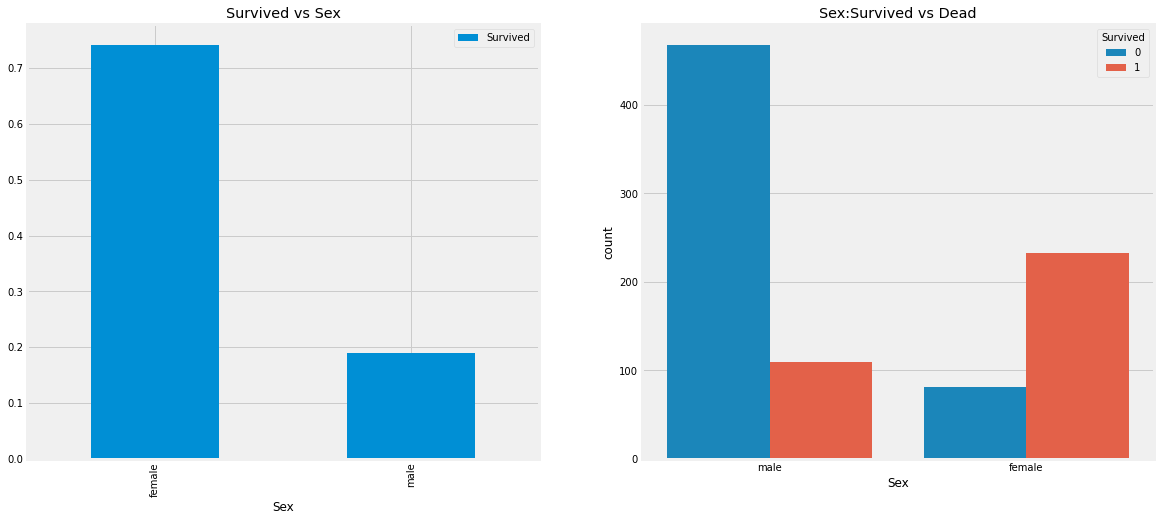

In [25]:
f, ax = plt.subplots(1,2, figsize = (18,8))
data[ ['Sex', 'Survived'] ].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

남성 탑승객이 더 많았음에도 여성의 생존자가 2배가 넘는 수 이다. 생존율 또한 여성은 75%에 달하는 반면 남성은 18% 정도에 그친다.

다른 데이터도 비교해보자.

#### Pclass -> Ordinal Feature

In [28]:
pd.crosstab(data.Pclass, data.Survived, margins= True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


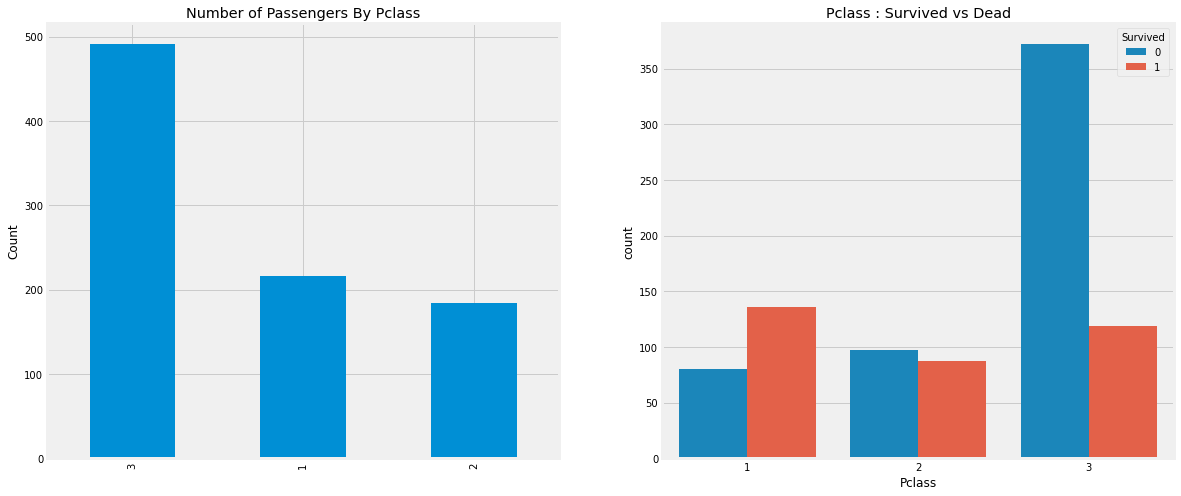

In [33]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

plt.show()

1등석 승객중에서 생존자가 가장 많았다. 탑승객은 3등급 승객이 가장 많았음에도 불구하고 생존율은 24%정도로 매우 낮았다는 것을 알  수 있다.

1등급 생존율은 63%, 2등급 생존율은 47% 정도로 탑승석 등급이 생존율에 많은 영향을 끼쳤다고 볼 수 있다.

다음은 성별과 좌석등급을 함께 보도록 하자.

In [4]:
pd.pivot_table(data=data, index='Pclass', values='Survived', aggfunc= 'mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
pd.crosstab( [data.Sex, data.Survived], data.Pclass , margins=True ).style.background_gradient(cmap='summer_r')

In [9]:
pd.crosstab( [data.Pclass, data.Sex], data.Survived, margins=True ).style.background_gradient(cmap='coolwarm')

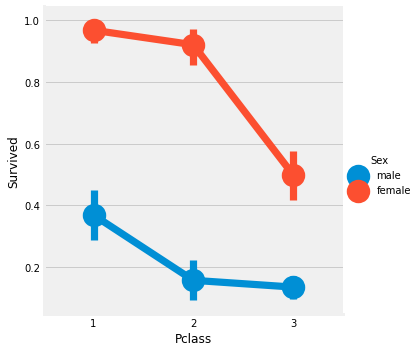

In [10]:
sns.factorplot('Pclass','Survived', hue = 'Sex', data = data )
plt.show()

FactorPlot을 이용한 이유는 범주형 자료를 분리해서 보여주기 때문이다.

Crosstab과 FactorPlot을 보면, 1등석 여성 승객의 생존율은 95~96%를 기록한 것을 볼 수 있다. 수치상으로는 94명의 승객중 단 3명만이 사망하였다.

모든 등급의 좌석에서 여성이 먼저 구출되었던 것으로 보인다. 1등급이라도 남자의 생존율은 낮기 때문이다.

다른 컬럼의 데이터도 살펴보자.

### Age -> Continous Feature

In [11]:
print('Oldest Passenger was of : ', data['Age'].max())
print('Youngest Passenger was of : ', data['Age'].min())
print('Average Age on the Ship : ', data['Age'].mean())

Oldest Passenger was of :  80.0
Youngest Passenger was of :  0.42
Average Age on the Ship :  29.69911764705882


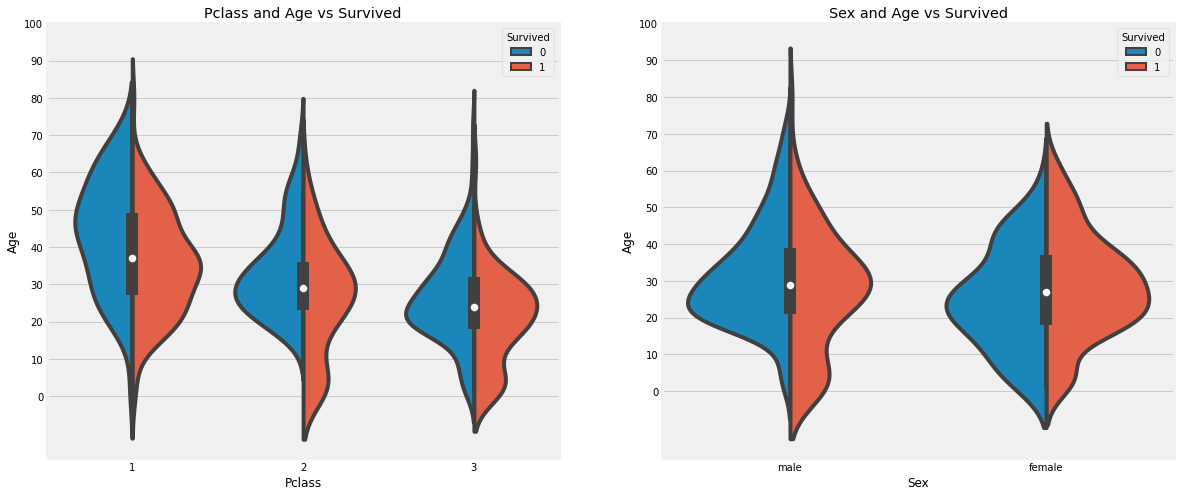

In [14]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split=True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived', data = data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

알게된 사실 :

1. 10세 이하 어린이는 좌석 등급과 관계없이 생존율이 높았다는 것을 알 수 있다.
2. 1등급 좌석의 20~50세 사이 성인은 '여성' 승객의 생존율 보다 높았다.
3. 남성의 경우 나이가 많아질수록 생존율이 감소하였다.

나이 데이터에는 177개의 Null값이 존재하여 그것을 처리하기 위해 평균나이를 활용할 수도 있다.
그러나 승객의 나이대는 너무나 다양하고 실제로는 4살 아이일 수도 있는 승객에게 평균나이를 대입할 수는 없다. 
승객의 나이대를 추정할 수 있는 데이터는 무엇일까?

이름 데이터를 사용하는 방법이 있다. Mr 나 Mrs 같은 호칭을 가진 승객에게 비슷한 나이를 대입할 수 있다.

In [4]:
data['Initial'] = 0

for i in data :
    data['Initial'] = data.Name.str.extract( '([A-Za-z]+)\.' )

[A-Za-z]+) 를이용해서 . 앞에 A-Za-z 를 추출할 수 있다. 그렇게 이름앞에 붙은 이니셜을 찾아낸다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


오타가난 이니셜도 있고 다른 이니셜도 눈에 띈다. 이것들을 수정해보자.

In [5]:
data['Initial'].replace( ['Mlle', 'Mme', 'Ms', 'Dr' , 'Major', 'Lady' , 'Countess' , 'Jonkheer' , 'Col' , 'Rev', 'Capt', 'Sir', 'Don'],
                         ['Miss', 'Miss', 'Miss', 'Mr', 'Mr','Mrs', 'Mrs', 'Other', 'Other','Other','Mr','Mr','Mr'], inplace=True)

In [6]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling Nan Ages

In [7]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr') , 'Age' ] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs') , 'Age' ] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Master') , 'Age' ] = 5 
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss') , 'Age' ] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Other') , 'Age' ] = 46

In [8]:
data.Age.isnull().any()

False

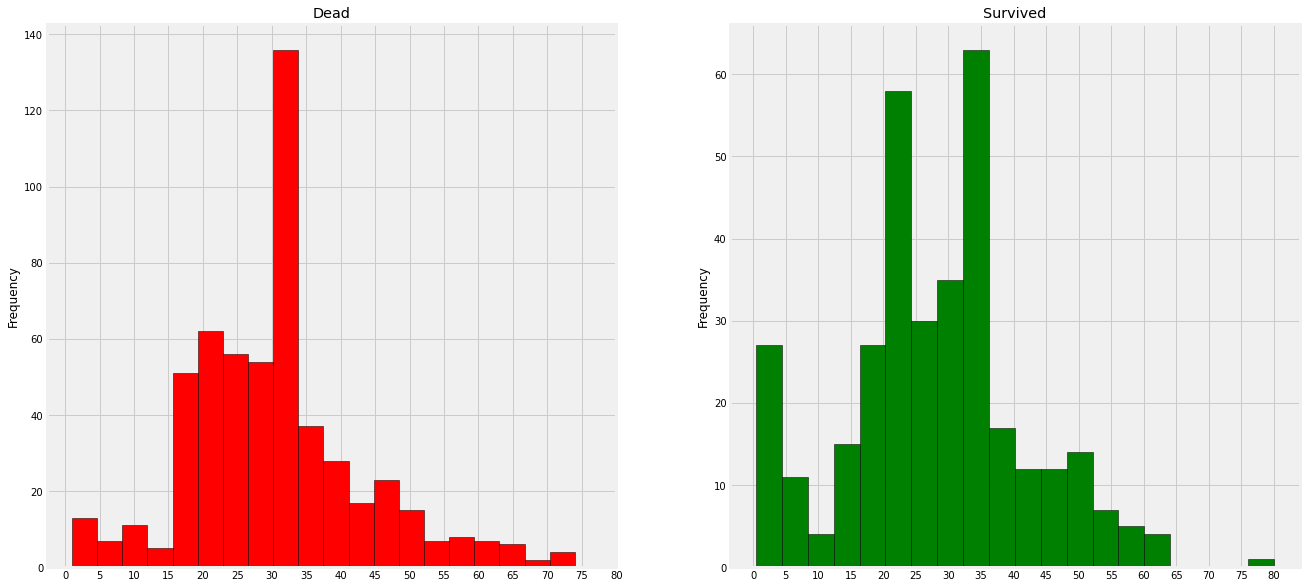

In [25]:
f, ax = plt.subplots( 1, 2, figsize = (20,10))

data[ data['Survived'] == 0 ].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black' , color = 'red')
ax[0].set_title('Dead')
ax[0].set_xticks(range(0, 85, 5))

data[ data['Survived'] == 1 ].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black' , color = 'green' )
ax[1].set_title('Survived')
ax[1].set_xticks(range(0, 85, 5))

plt.show()

Observation :

1. 5세미만 유아의 생존율은 높았다.
2. 최고령 생존자는 80세이다.
3. 30대의 사망이 가장 많았다.

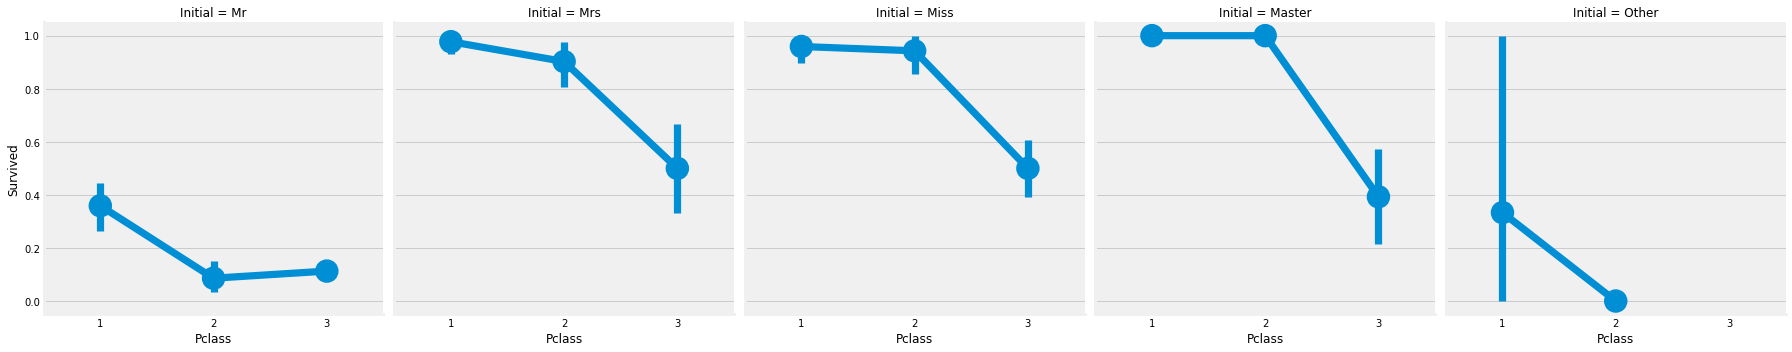

In [9]:
sns.factorplot('Pclass' , 'Survived', col = 'Initial', data = data)
plt.show()

### Embarked -> Categorical Value

In [11]:
pd.crosstab( [data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True ).style.background_gradient(cmap = 'summer_r')

#### Chances for Survival by Port of Embarkation

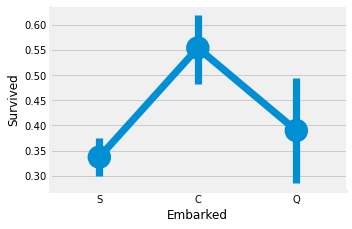

In [16]:
sns.factorplot('Embarked' , 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

선착장 C의 생존율이 높았다는 것을 알 수 있다.

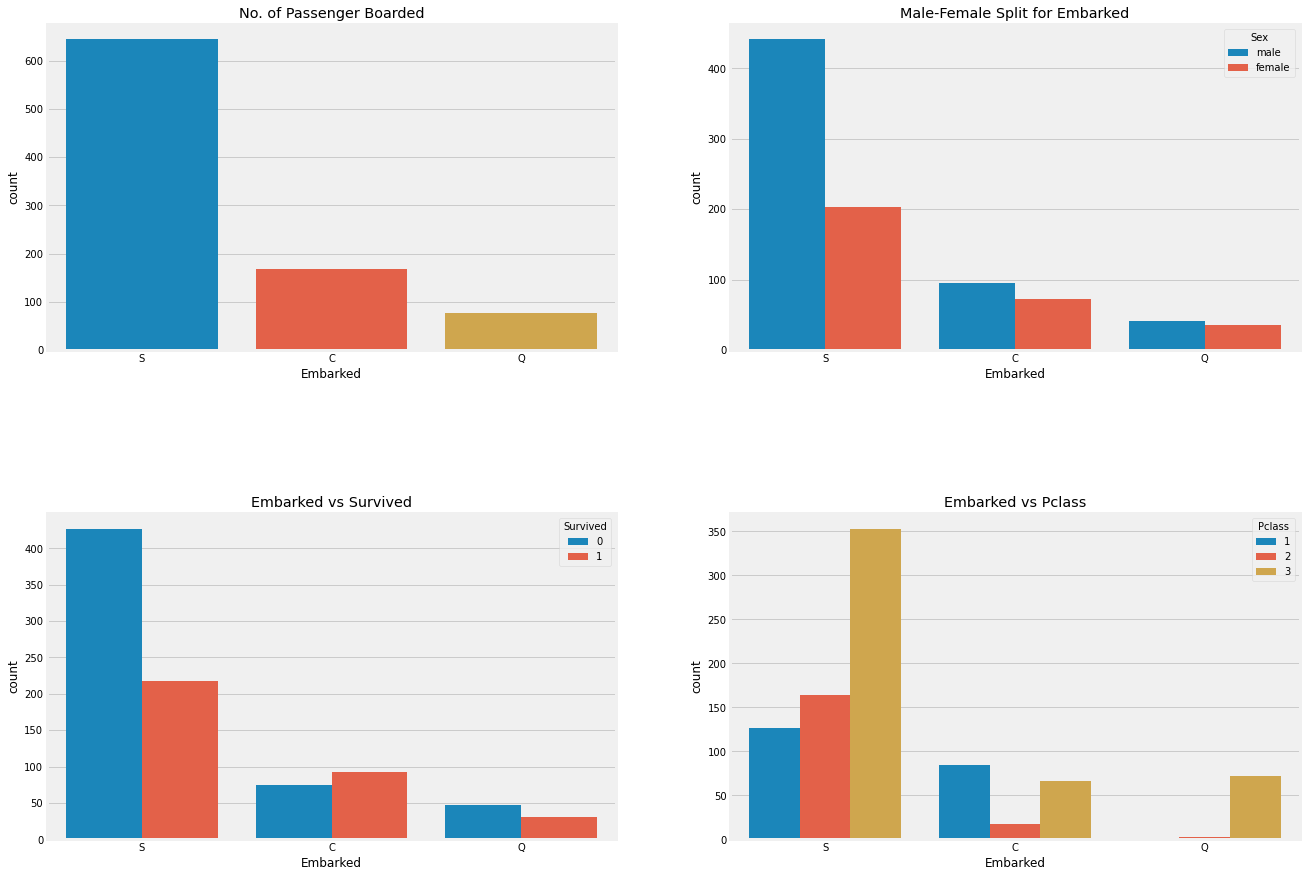

In [19]:
f, ax = plt.subplots(2,2, figsize = (20,15))

sns.countplot('Embarked', data = data, ax = ax[0,0] )
ax[0,0].set_title('No. of Passenger Boarded')

sns.countplot('Embarked' , hue = 'Sex' , data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue = 'Survived' , data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue = 'Pclass' , data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2 , hspace=0.5)
plt.show()

Observations : 

1. S 선착장 탑승자가 가장 많았다. 그중에는 3등급 탑승객이 많았다.
2. C 선착장 탑승객의 생존율이 높았는데, 이는 1등급, 2등급 탑승객의 구출이 영향을 많이 끼쳤을것이라 생각된다.
3. 부유한 사람들이 S 선착장에서 탑승이 많았다. 생존율이 낮게 나온 이유는 이 선착장에서 탑승한 3등급 탑승객이 대부분 (81%) 사망했기 때문으로 보인다.
4. 선착장 Q에서는 95% 승객이 3등급 탑승객이었다.

In [21]:
pd.pivot_table(data = data, index= [data.Embarked , data.Pclass], values='Survived', aggfunc= 'mean' )

Survived
Embarked Pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802

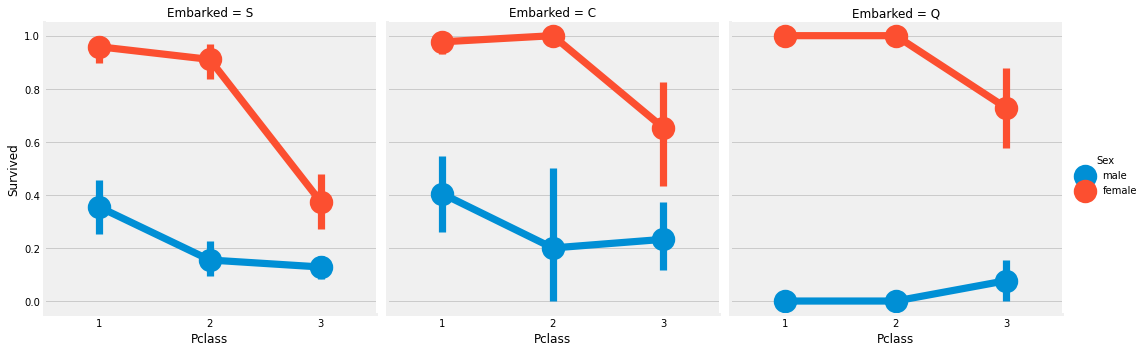

In [22]:
sns.factorplot('Pclass' , 'Survived' , hue = 'Sex' , col = 'Embarked' , data = data)
plt.show()

Observations :
1. 1등급, 2등급 여성 탑승객의 생존율은 선착장과 관계없이 1에 가깝다.
2. S선착장 3등급 승객은 두 성별 모두에서 생존율이 낮았다.
3. Q선착장 탑승객 남성은 Pclass와 관계없이 다른 선착장에 비해 생존율이 낮았다.

### Filling Embarked NaN

가장 많은 승객이 탑승한 S 선착장으로 NaN을 대체한다.

In [23]:
data['Embarked'].fillna('S', inplace= True)

In [24]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature

이산형 데이터는 수치적인 의미를 가지나 소수점 형태로 표현되지 못하는 데이터를 의미합니다.

이 데이터는 승객이 가족이 몇명인지, 혹은 혼자인지 보여주는 데이터이다.

Sibling -> Brother, Sister, Stepbrother, Stepsister

Spouse -> Husband, Wife

In [26]:
pd.crosstab([data.SibSp], data.Survived ).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


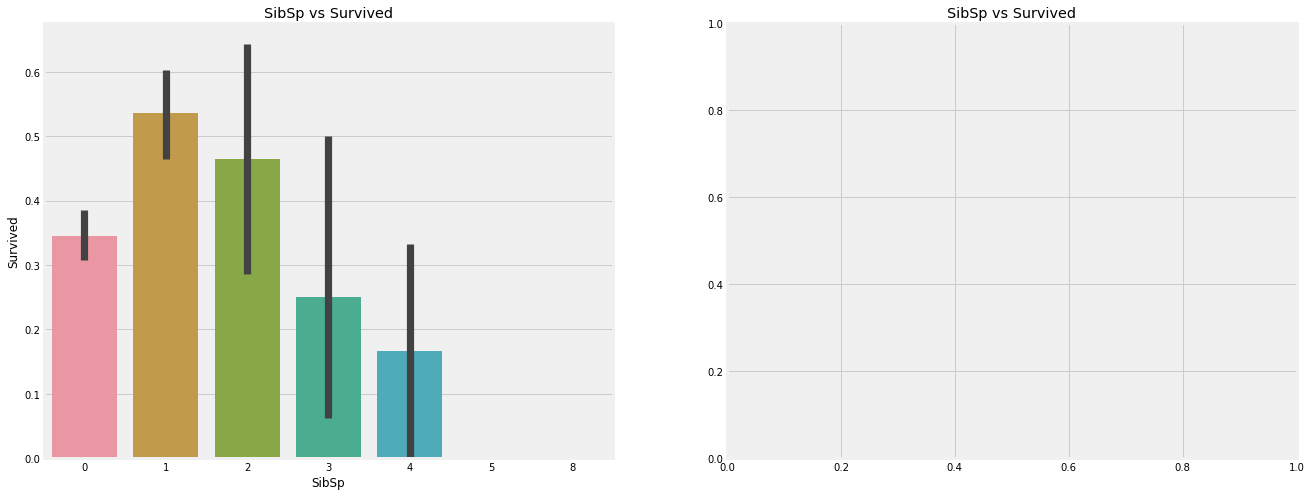

In [41]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp' , 'Survived', data = data, ax= ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [42]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations : 
그래프에서 보듯이 가족이 없는 승객은 34.5%의 생존율을 보인다. 대략적으로 가족의 수가 많을수록 생존율이 하락하는 것으로 보인다. 가족이 있다면 자기 자신보다는 가족들을 먼저 구출시키려고 했을 수 있기때문이다. 놀랍게도 5인이상 가족의 생존율은 0% 였다. Pclass의 영향이 있었을까?

크로스탭을 보면 4인 이상 가족은 전부 Pclass 3 이었다는 것을 알 수 있다. Pclass 3의 대가족의 생존률은 거의 0에 가까웠다.

### Parch

In [43]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


역시 가족수가 많은 가족은 Pclass 3 에 있었다는 것을 알 수 있다.

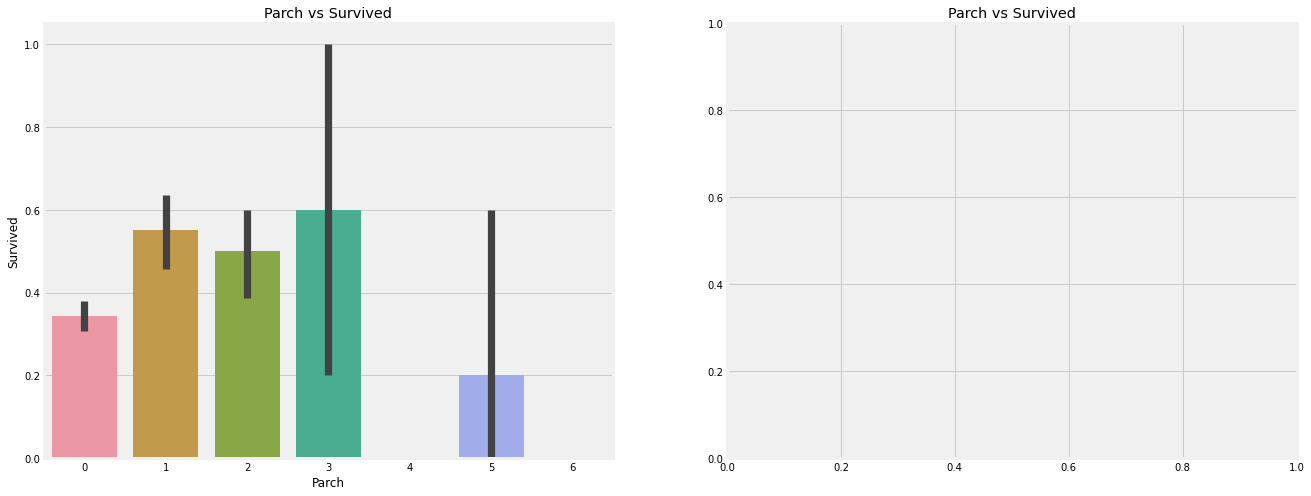

In [44]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))

sns.barplot('Parch' , 'Survived' , data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

Observations :

부모와 함께 탑승한 승객의 생존율이 높았지만, 그 수가 많아질수록 생존율은 오히려 하락했다.

1~3 명의 부모와 함께 탑승했을때 생존율이 높았다. 혼자이거나 4명이상의 부모가 탑승한 승객의 생존율은 낮았다.

### Fare -> Continous Feature

In [45]:
print('Highest Fare :' , data['Fare'].max() )
print('Lowest Fare : ', data['Fare'].min())
print('Average Fare :', data['Fare'].mean())

Highest Fare : 512.3292
Lowest Fare :  0.0
Average Fare : 32.204207968574636


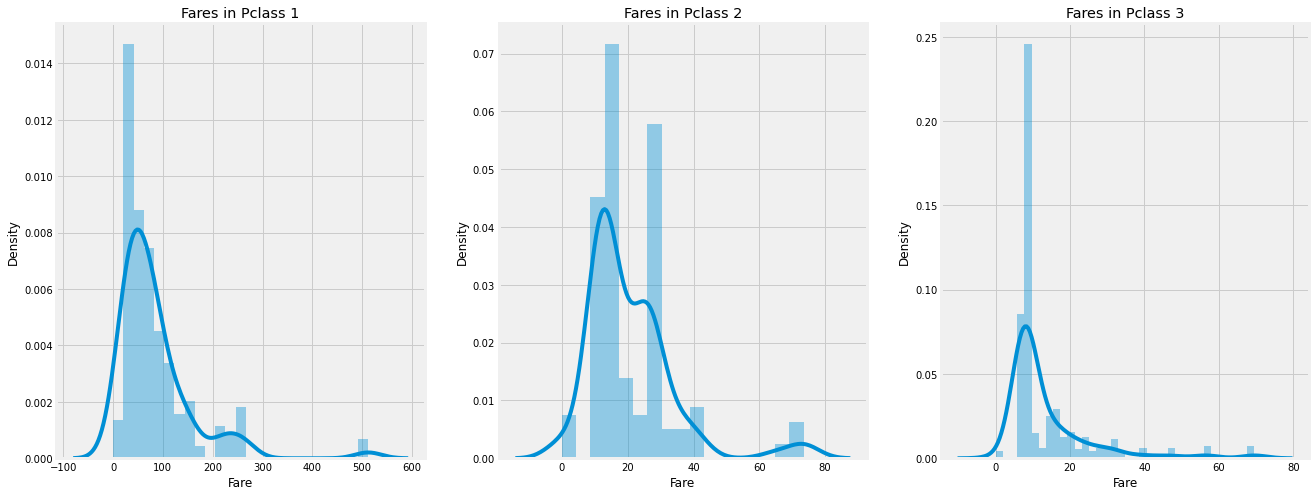

In [46]:
f, ax = plt.subplots(1,3,figsize = (20,8))

sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0] )
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1] )
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2] )
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass 1 의 요금은 매우 넓게 분포되어 있다. Fare 데이터는 현재 Continous Data 인데, 우리는 구간화를 통해 Discrete Data로 바꿔줄 수 있다.

#### Features 에 대한 간단한 정리 :

Sex : 여성의 생존율이 남성에 비해 높았다.

Pclass : 1등급 승객의 생존율이 높았다는 것은 확실하다. 또한 3등급의 생존율은 매우 낮았다. 특히나 Pclass 1 여성 승객의 생존율은 거의 1에 가까우며 2등급 또한 그렇다. 비싼 등급의 좌석일수록 생존율이 높았다.

Age : 5~10세 어린이 그룹의 생존율이 높았던 반면, 15~35세 그룹의 생존율이 낮았다.

Embarked : 흥미로운 데이터였다. 대부분의 1등급 승객이 S선착장에서 탑승했음에도 불구하고 C 선착장 승객의 생존율이 높았다. Q선착장 승객의 경우 대부분 3등급 승객이었다.

Parch + SibSp : 1~2 명의 형제, 배우자가 있거나 1~3 명의 부모가 함께 탑승한 승객의 생존율이 혼자 탑승했거나 많은 인원의 가족이 함께 탑승한 승객보다 높았다.

### Correlation Between The Features

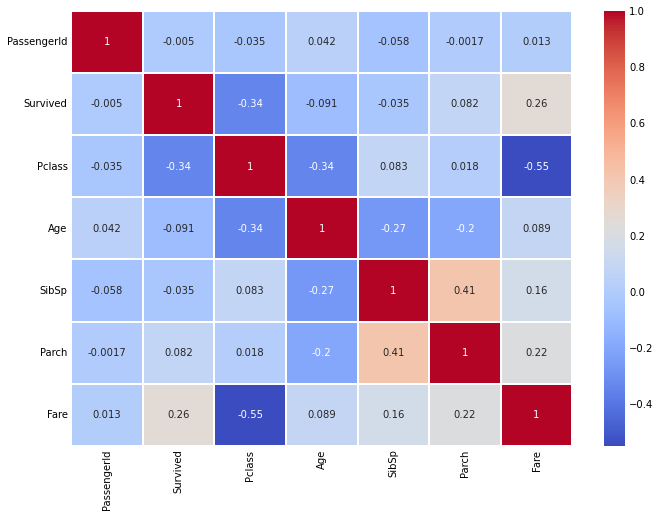

In [49]:
sns.heatmap(data.corr(), annot= True, cmap='coolwarm', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##### Interpreting The Heatmap

1. 우리는 수치형 데이터만 비교가능하다. 문자나, 알파벳은 관계를 비교할 수 없기 때문이다. 상관관계란 무엇인가?

    - Positive Correlation : A feature 의 증가는 B feature의 증가로 이어지는 것을 의미한다. 1은 완벽한 양의 상관관계를 의미한다.
    - Negative Correlation : A feature 의 증가는 B feature의 감소로 이어지는 것을 의미한다. -1은 완벽한 음의 상관관계를 의미한다.
<br>
</br>

2. 어떤 두 Feature 가 거의 완벽하게 상관관계를 띄고 있어서 한쪽의 증가는 다른 데이터의 증가로 이어진다고 해보자. 이것은 두 데이터가 매우 비슷한 정보를 가지고 있고, 데이터의 분산이 거의 없다는 것을 의미한다. 이것을 우리는 다중공선성 (Multicollinearity) 이라고 하며 두 데이터가 거의 같은 정보를 가진다고 볼 수 있다.
<br>
</br>
3. 거의 중복에 가까운 데이터를 둘다 사용해야할까? 트레이닝 모델을 만들때는 이러한 현상을 줄여서 Training Time 을 줄일 필요가 있다.
<br>
</br>
4. 위의 Heatmap으로 돌아와서, 우리는 Features 가 아주 강하게 상관관계를 갖지는 않는 것으로 볼 수 있다. 가장 높은 상관관계는 SinSp 와 Parch 인데 0.41 이다. 따라서 우리는 모든 데이터를 활용하고자 한다.